In [83]:
!pip install pycombat
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [99]:
import pycombat
import torch
import pandas as pd
import umap
import numpy as np
import matplotlib.pylab as plt

In [44]:
latent = torch.load('latent.pt')

In [71]:
dfz = pd.DataFrame(latent.detach().numpy())
z_markers = dfz.columns

In [72]:
dfz["source"] = [0]*100000 + [1]*100000
dfz

,0,1,2,3,4,source
0,0.013874,0.063028,-0.638284,-0.057956,0.026919,0
1,-0.379106,0.089212,-0.216994,0.078749,0.060472,0
2,-0.781900,0.188675,-1.194468,-0.085054,-0.092813,0
3,-0.980950,0.114271,-3.515575,-0.139125,0.118408,0
4,0.115453,0.071264,-0.160749,-0.052378,-0.015491,0
...,...,...,...,...,...,...
199995,0.631704,-0.094303,-0.598741,-0.141619,-0.028522,1
199996,0.613822,-0.170012,1.083715,0.011373,0.033828,1
199997,0.547640,-0.181142,1.496431,0.012339,-0.033310,1
199998,0.703170,-0.150787,0.846392,0.014670,0.051903,1


In [73]:
x_train = torch.load('dataset_xtrain.pt')
df = pd.DataFrame(x_train.detach().numpy())
x_markers = df.columns
df["source"] = [0]*100000 + [1]*100000

In [60]:
# Make a umap of the latent space
def computeUMAProjectionOfLatentSpace(df, display=True):
    
    df = df.sample(1000)
    latent = df.drop(columns=["source"])

    # Compute t-SNE embedding of latent space
    print("Computing umap embedding...")
    model = umap.UMAP(n_components=2, random_state=0)
    X_umap = model.fit_transform(latent)

    # Plot images according to t-sne embedding
    if display:
        print("Plotting umap visualization...")
        plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df.source)
        plt.show()
    else:
        return X_umap

Computing umap embedding...
Plotting umap visualization...


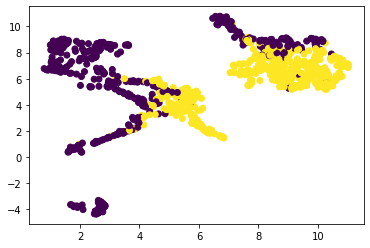

In [61]:
computeUMAProjectionOfLatentSpace(df)

Computing umap embedding...
Plotting umap visualization...


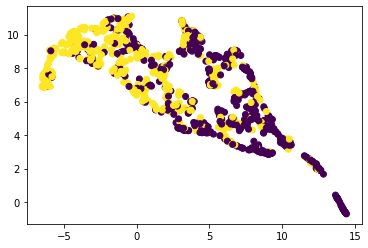

In [62]:
computeUMAProjectionOfLatentSpace(dfz)

In [110]:
combat = pycombat.Combat()
df_corrected = combat.fit_transform(Y=np.array(df[x_markers]),b = np.array(df['source']), X = np.array(df[x_markers]), C = None )
dfz_corrected = combat.fit_transform(Y=np.array(dfz[z_markers]),b = np.array(dfz['source']), X = np.array(dfz[z_markers]), C = None )


In [108]:
df_corrected = pd.DataFrame(df_corrected)
df_corrected['source'] = df['source']

In [111]:
dfz_corrected = pd.DataFrame(dfz_corrected)
dfz_corrected['source'] = dfz['source']

Computing umap embedding...
Plotting umap visualization...


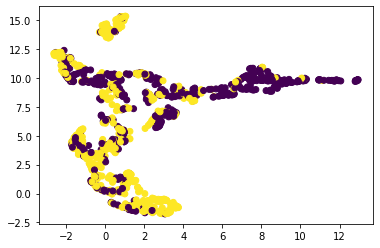

In [112]:
computeUMAProjectionOfLatentSpace(dfz_corrected)